In [27]:
### ==============================
### Spotify Dataset: Encoding & EDA
### ==============================


### Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### Step 2: Load Cleaned Dataset
df = pd.read_csv("spotify_tracks_clean.csv")

print("Dataset shape (after cleaning):", df.shape)
display(df.head())


Dataset shape (after cleaning): (113999, 21)


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [26]:
### Step 3: Encoding Categorical Variables

# --- 3a. Encode 'explicit' column ---
# Convert 'explicit' to integer (0 = clean, 1 = explicit)
df['explicit'] = df['explicit'].astype(int)
print("\nExplicit column converted to int:")
print(df[['explicit']].head())

print(df['explicit'].value_counts())



Explicit column converted to int:
   explicit
0         0
1         0
2         0
3         0
4         0
explicit
0    104252
1      9747
Name: count, dtype: int64


In [30]:
# --- 3b. Label Encode 'track_genre' ---
encoder = LabelEncoder()
df['track_genre_encoded'] = encoder.fit_transform(df['track_genre'])

print("\nTrack genre encoded (Label Encoding) - sample:")
print(df[['track_genre', 'track_genre_encoded']].head())

# Show mapping: label -> genre
print("\nLabel encoding mapping (label -> genre):")
for label, genre in enumerate(encoder.classes_):
    print(label, "->", genre)



Track genre encoded (Label Encoding) - sample:
  track_genre  track_genre_encoded
0    acoustic                    0
1    acoustic                    0
2    acoustic                    0
3    acoustic                    0
4    acoustic                    0

Label encoding mapping (label -> genre):
0 -> acoustic
1 -> afrobeat
2 -> alt-rock
3 -> alternative
4 -> ambient
5 -> anime
6 -> black-metal
7 -> bluegrass
8 -> blues
9 -> brazil
10 -> breakbeat
11 -> british
12 -> cantopop
13 -> chicago-house
14 -> children
15 -> chill
16 -> classical
17 -> club
18 -> comedy
19 -> country
20 -> dance
21 -> dancehall
22 -> death-metal
23 -> deep-house
24 -> detroit-techno
25 -> disco
26 -> disney
27 -> drum-and-bass
28 -> dub
29 -> dubstep
30 -> edm
31 -> electro
32 -> electronic
33 -> emo
34 -> folk
35 -> forro
36 -> french
37 -> funk
38 -> garage
39 -> german
40 -> gospel
41 -> goth
42 -> grindcore
43 -> groove
44 -> grunge
45 -> guitar
46 -> happy
47 -> hard-rock
48 -> hardcore
49 -> hardstyle
5

In [34]:
### Step 4: Count number of tracks per genre
genre_counts = df['track_genre'].value_counts()

# Show top 10 genres with their counts
print("Top 10 Genres with Counts:\n")
print(genre_counts.head(10))



Top 10 Genres with Counts:

track_genre
acoustic       1000
afrobeat       1000
alt-rock       1000
alternative    1000
ambient        1000
anime          1000
black-metal    1000
bluegrass      1000
blues          1000
brazil         1000
Name: count, dtype: int64


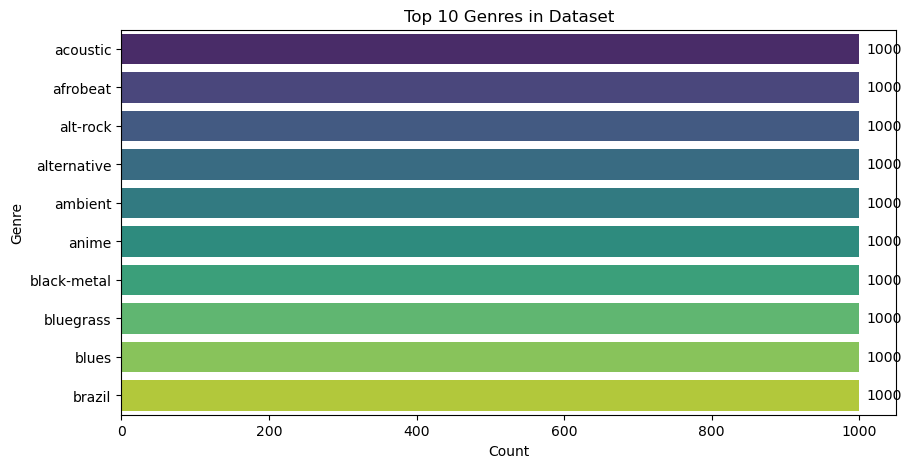

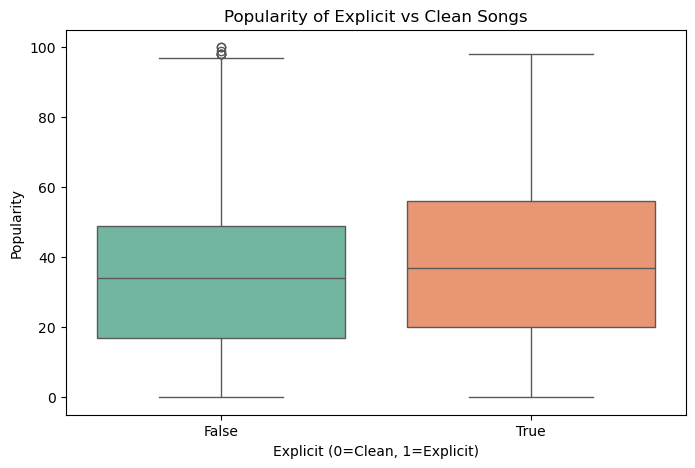

In [32]:
### Step 5: Exploratory Data Analysis (EDA)


# --- 5a. Barplot: Top 10 genres ---
plt.figure(figsize=(10,5))
ax = sns.barplot(
    y=genre_counts.head(10).index,
    x=genre_counts.head(10).values,
    hue=genre_counts.head(10).index, 
    dodge=False,
    palette="viridis",
    legend=False
)

# Annotate bars with counts
for i, v in enumerate(genre_counts.head(10).values):
    ax.text(v + 10, i, str(v), color='black', va='center')

plt.title("Top 10 Genres in Dataset")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()




# --- 5b. Boxplot: Popularity of Explicit vs Clean Songs ---
plt.figure(figsize=(8,5))
sns.boxplot(
    x='explicit', 
    y='popularity', 
    data=df, 
    hue='explicit',      
    legend=False,         
    palette="Set2"
)
plt.title("Popularity of Explicit vs Clean Songs")
plt.xlabel("Explicit (0=Clean, 1=Explicit)")
plt.ylabel("Popularity")
plt.show()


In [33]:
### Step 6: Sanity Check (Optional)
print("\nCounts by original genre:")
print(df['track_genre'].value_counts())
print("\nCounts by encoded genre:")
print(df['track_genre_encoded'].value_counts())


Counts by original genre:
track_genre
acoustic       1000
afrobeat       1000
alt-rock       1000
alternative    1000
ambient        1000
               ... 
techno         1000
turkish        1000
trip-hop       1000
world-music    1000
k-pop           999
Name: count, Length: 114, dtype: int64

Counts by encoded genre:
track_genre_encoded
0      1000
1      1000
2      1000
3      1000
4      1000
       ... 
109    1000
112    1000
111    1000
113    1000
65      999
Name: count, Length: 114, dtype: int64


In [37]:
### Step 7: Save Cleaned Dataset
df.to_csv("spotify_tracks_Encoding.csv", index=False)
print("\nCleaned dataset saved as data/spotify_tracks_Encoding .csv")


Cleaned dataset saved as data/spotify_tracks_Encoding .csv
